In [7]:
#Comcast Telecom Consumer Complaints
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [115]:
df=pd.read_csv('/Users/dcgajjar/Desktop/AI Engineer/Projects/Data/Comcast_telecom_complaints_data.csv',parse_dates=['Date_month_year'])

In [116]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [125]:
df['Date_month_year'].value_counts()[:3]

2015-06-24    218
2015-06-23    190
2015-06-25     98
Name: Date_month_year, dtype: int64

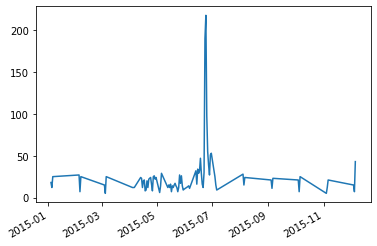

In [127]:
df["Date_month_year"].value_counts().plot()

In [144]:
#monthly and daily granularity levels
df['day'] = pd.DatetimeIndex(df['Date_month_year']).day
df['month'] = pd.DatetimeIndex(df['Date_month_year']).month


In [120]:
df['day']

0       22
1        4
2       18
3        5
4       26
        ..
2219     4
2220     6
2221     6
2222    23
2223    24
Name: day, Length: 2224, dtype: int64

In [121]:
df['month']

0       4
1       8
2       4
3       7
4       5
       ..
2219    2
2220    2
2221    9
2222    6
2223    6
Name: month, Length: 2224, dtype: int64

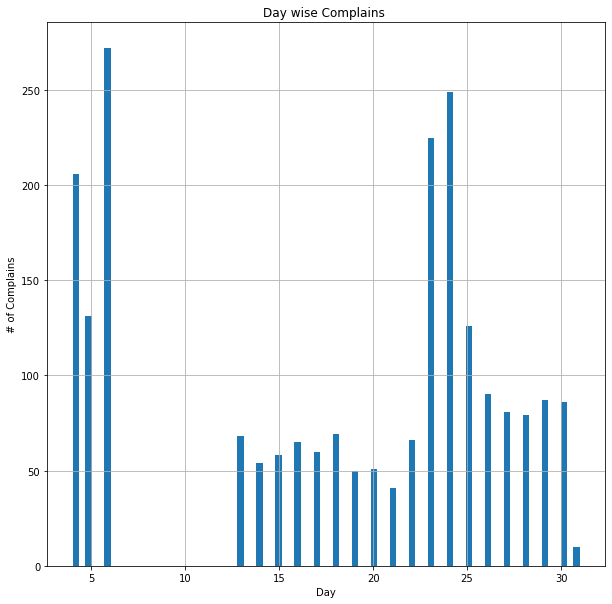

In [44]:
plt.figure(figsize=(10,10))
df['day'].hist(bins=80)
plt.title('Day wise Complains ')
plt.xlabel('Day')
plt.ylabel('# of Complains')
plt.show()

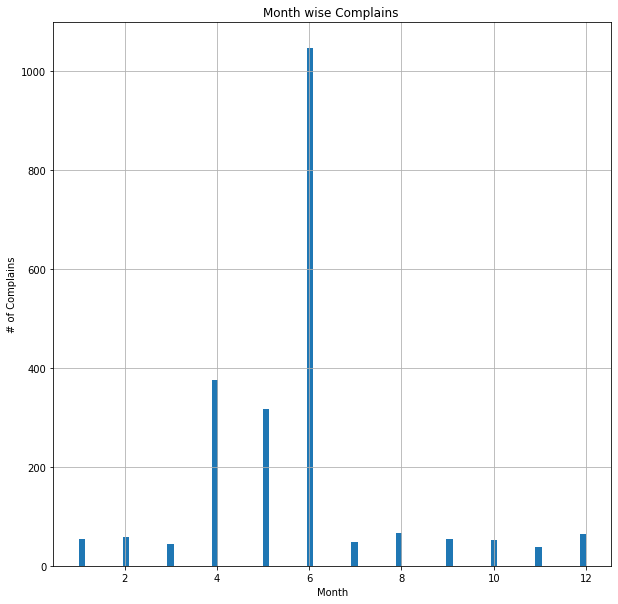

In [45]:
plt.figure(figsize=(10,10))
df['month'].hist(bins=80)
plt.title('Month wise Complains ')
plt.xlabel('Month')
plt.ylabel('# of Complains')
plt.show()

In [135]:
##Provide a table with the frequency of complaint types.
df.groupby('Customer Complaint').size().sort_values(ascending=False).to_frame().reset_index().rename({0:'Count of Complaints'},axis=1)

,Customer Complaint,Count of Complaints
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,Lack of availability,1
1837,Lack of communication and poor customer service,1
1838,Lack of consistent service,1
1839,Lack of internet speed,1


In [160]:
#Which state has the maximum complaints
a1=df.groupby('State').size().sort_values(ascending=False).to_frame().reset_index().rename({0:'Count'},axis=1)
a1.head(5)

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


In [142]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]

In [143]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,day,month,newStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,Closed


In [151]:
#Which state has the highest percentage of unresolved complaints
n1=df.groupby(['State','newStatus']).size().unstack().fillna(0)
n1

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [157]:
n1.max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

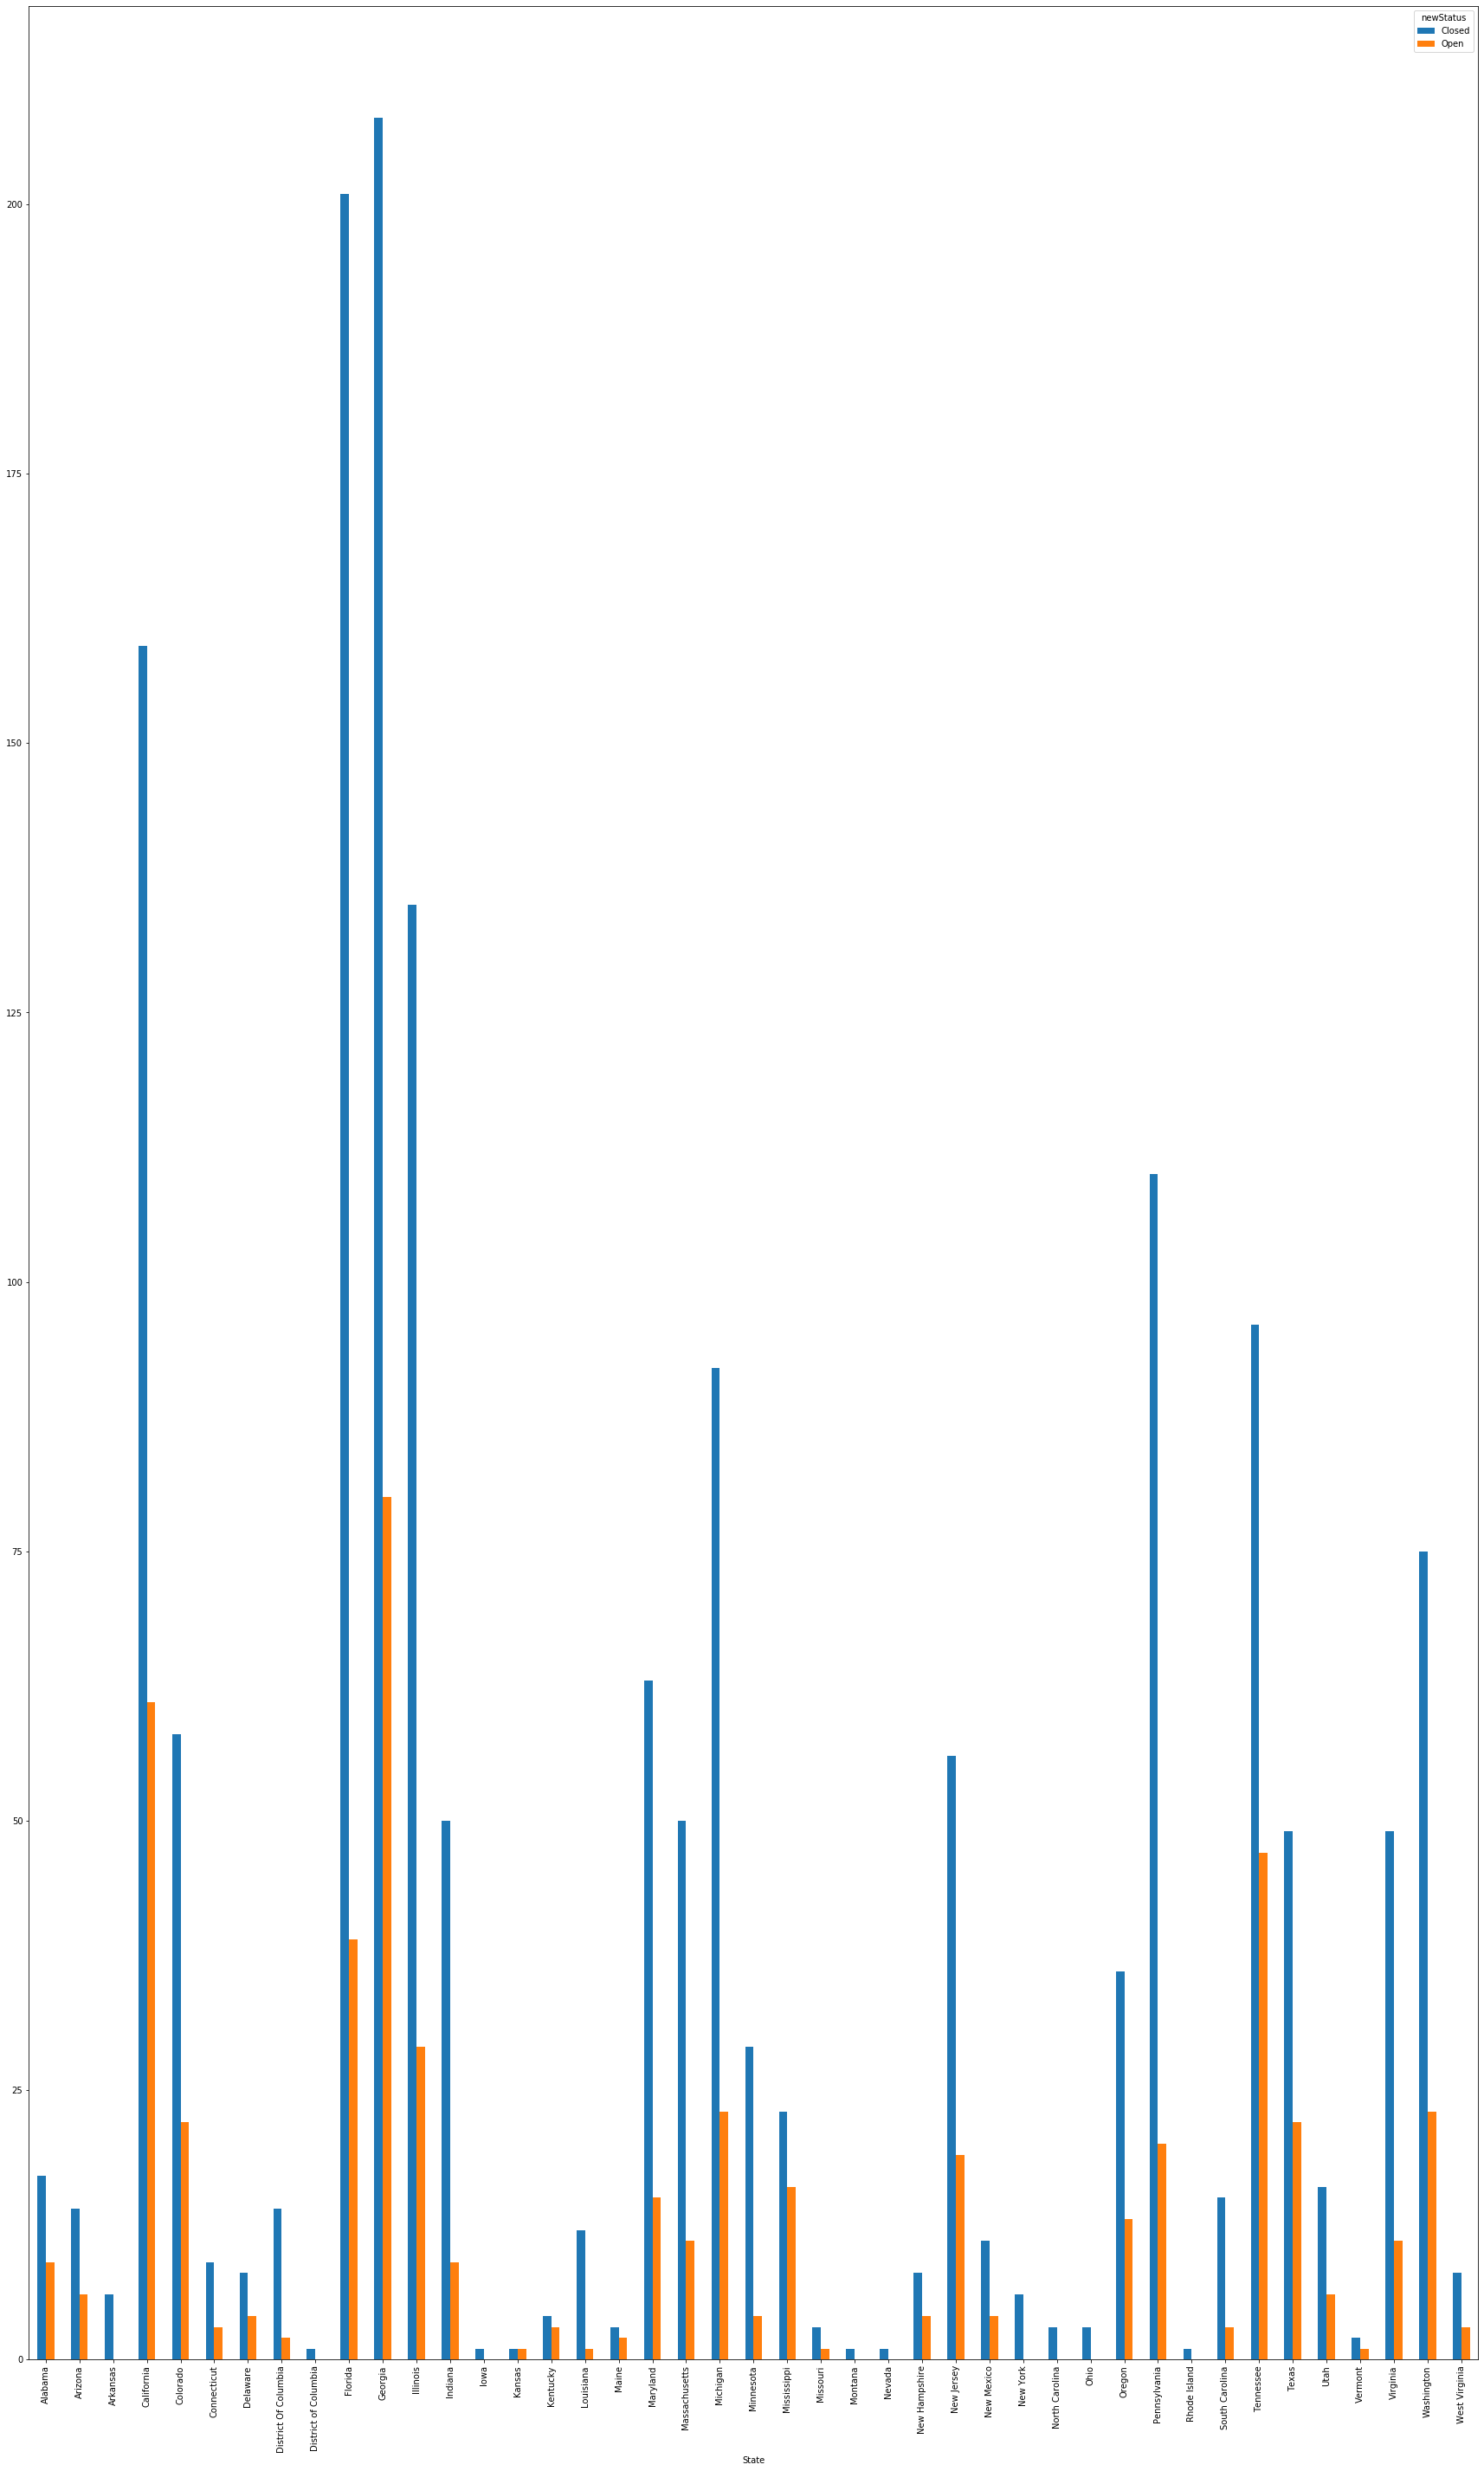

In [163]:
n1.plot(kind='bar',figsize=(30,50),stacked=False)

In [ ]:
#Georgia state has got maxium number of complaints from the users and it has maximum no of unresolved complaints 